In [1]:
import pandas as pd
import duckdb
import plotly.graph_objects as go
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv(r"C:\Users\SWAPNIL\supply_chain_data.csv")

df.head()

Product type   SKU      Price  Availability  Number of products sold  \
0     haircare  SKU0  69.808006            55                      802   
1     skincare  SKU1  14.843523            95                      736   
2     haircare  SKU2  11.319683            34                        8   
3     skincare  SKU3  61.163343            68                       83   
4     skincare  SKU4   4.805496            26                      871   

   Revenue generated Customer demographics  Stock levels  Lead times  \
0        8661.996792            Non-binary            58           7   
1        7460.900065                Female            53          30   
2        9577.749626               Unknown             1          10   
3        7766.836426            Non-binary            23          13   
4        2686.505152            Non-binary             5           3   

   Order quantities  ...  Location Lead time  Production volumes  \
0                96  ...    Mumbai        29                 215   
1                37  ...    Mumbai        23                 517   
2                88  ...    Mumbai        12                 971   
3                59  ...   Kolkata        24                 937   
4                56  ...     Delhi         5                 414   

  Manufacturing lead time Manufacturing costs  Inspection results  \
0                      29           46.279879             Pending   
1                      30           33.616769             Pending   
2                      27           30.688019             Pending   
3                      18           35.624741                Fail   
4                       3           92.065161                Fail   

   Defect rates  Transportation modes   Routes       Costs  
0      0.226410                  Road  Route B  187.752075  
1      4.854068                  Road  Route B  503.065579  
2      4.580593                   Air  Route C  141.920282  
3      4.746649                  Rail  Route A  254.776159  
4      3.145580                   Air  Route A  923.440632  

[5 rows x 24 columns]

In [4]:
df.columns

Index(['Product type', 'SKU', 'Price', 'Availability',
       'Number of products sold', 'Revenue generated', 'Customer demographics',
       'Stock levels', 'Lead times', 'Order quantities', 'Shipping times',
       'Shipping carriers', 'Shipping costs', 'Supplier name', 'Location',
       'Lead time', 'Production volumes', 'Manufacturing lead time',
       'Manufacturing costs', 'Inspection results', 'Defect rates',
       'Transportation modes', 'Routes', 'Costs'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Product type             100 non-null    object 
 1   SKU                      100 non-null    object 
 2   Price                    100 non-null    float64
 3   Availability             100 non-null    int64  
 4   Number of products sold  100 non-null    int64  
 5   Revenue generated        100 non-null    float64
 6   Customer demographics    100 non-null    object 
 7   Stock levels             100 non-null    int64  
 8   Lead times               100 non-null    int64  
 9   Order quantities         100 non-null    int64  
 10  Shipping times           100 non-null    int64  
 11  Shipping carriers        100 non-null    object 
 12  Shipping costs           100 non-null    float64
 13  Supplier name            100 non-null    object 
 14  Location                 10

In [6]:
df.isnull().sum()

Product type               0
SKU                        0
Price                      0
Availability               0
Number of products sold    0
Revenue generated          0
Customer demographics      0
Stock levels               0
Lead times                 0
Order quantities           0
Shipping times             0
Shipping carriers          0
Shipping costs             0
Supplier name              0
Location                   0
Lead time                  0
Production volumes         0
Manufacturing lead time    0
Manufacturing costs        0
Inspection results         0
Defect rates               0
Transportation modes       0
Routes                     0
Costs                      0
dtype: int64

In [7]:
df.duplicated().sum()

0

In [8]:
query = """
    SELECT SUM("Revenue generated")::DECIMAL(8, 2) AS total_revenue
    FROM df
"""
result = duckdb.query(query).df()

print(result)

   total_revenue
0      577604.82


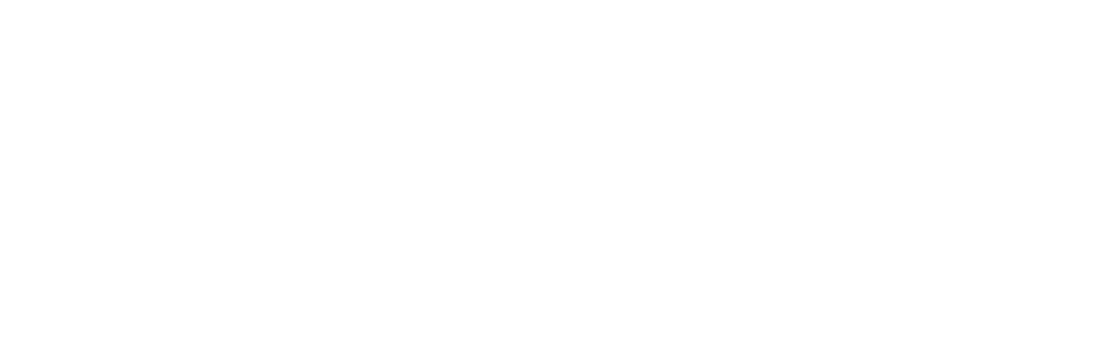

In [9]:
total_revenue = result['total_revenue'][0]

fig = go.Figure()

fig.add_trace(go.Indicator(
    mode = "number",
    value = total_revenue,
    title = {"text": "Total Revenue Generated"},
    number = {'prefix': "$", 'valueformat': ".2f"},
    domain = {'x': [0, 1], 'y': [0, 1]}
))

fig.update_layout(
    font=dict(size=18),
    font_color = 'white',
    paper_bgcolor='rgba(0, 0, 0, 0)',
)

fig.show()

In [10]:
query = """
    SELECT "Product Type",
           SUM("Revenue generated")::DECIMAL(8, 2) AS total_revenue
    FROM df
    GROUP BY "Product Type"
    ORDER BY total_revenue DESC
"""
result = duckdb.query(query).df()

print(result)

  Product type  total_revenue
0     skincare      241628.16
1     haircare      174455.39
2    cosmetics      161521.27


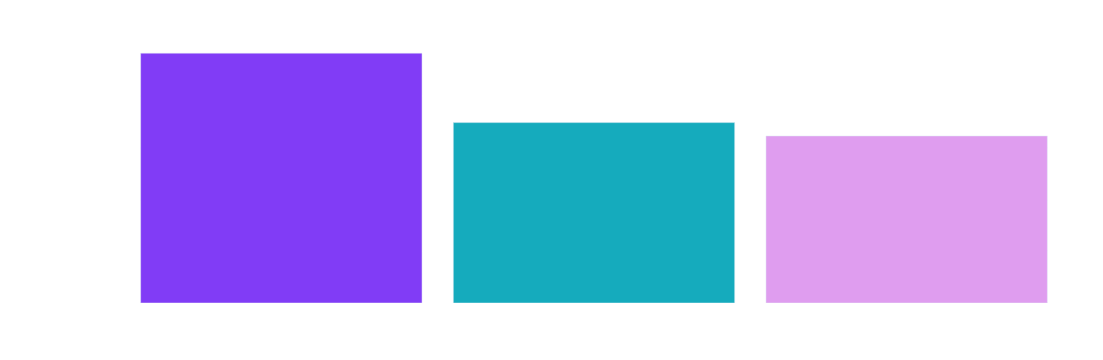

In [11]:
fig = px.bar(result, 
             x='Product type', 
             y='total_revenue', 
             title='Revenue Generated by Product Type',
             labels={'total_revenue': 'Total Revenue ($)', 'Product Type': 'Product Type'})

fig.update_layout(
    xaxis_title="Product Type",
    yaxis_title="Total Revenue ($)",
    yaxis_tickprefix="$",
    yaxis_tickformat=".2f",
    margin=dict(l=40, r=40, t=40, b=40),
    font=dict(size=14),
    font_color='white',
    plot_bgcolor='rgba(0, 0, 0, 0)',
    paper_bgcolor='rgba(0, 0, 0, 0)', 
    bargap=0,
    bargroupgap=0.1
)


fig.update_traces(marker=dict(color=['#813cf6', '#15abbd', '#df9def']))
fig.show()

In [12]:
query = """
    SELECT "location",
           SUM("Revenue generated")::DECIMAL(8, 2) AS total_revenue
    FROM df
    GROUP BY "location"
    ORDER BY total_revenue DESC
"""
result = duckdb.query(query).df()

print(result)

    Location  total_revenue
0     Mumbai      137755.03
1    Kolkata      137077.55
2    Chennai      119142.82
3  Bangalore      102601.72
4      Delhi       81027.70


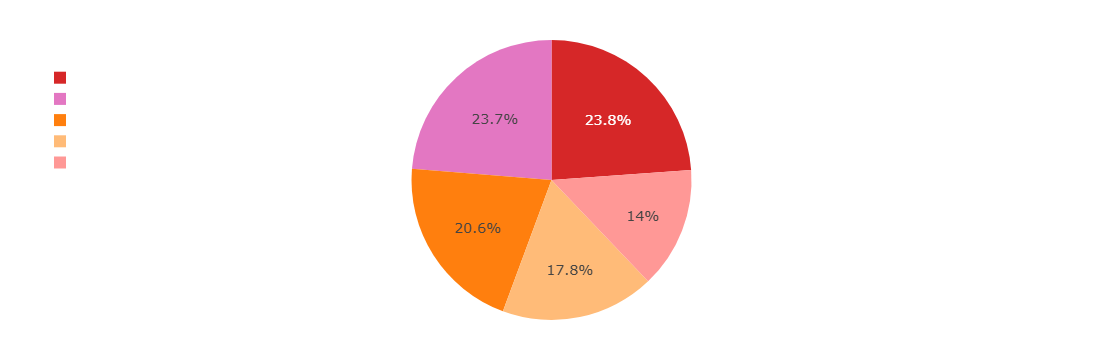

In [13]:
fig = px.pie(result, 
             values='total_revenue', 
             names='Location', 
             title='Revenue Distribution by Location',
             labels={'total_revenue': 'Total Revenue ($)', 'Location': 'Location'},
             hover_name='Location',
             hover_data={'total_revenue': ':,.2f'}
            )

fig.update_layout(
    margin=dict(l=40, r=40, t=40, b=40),
    font=dict(size=14, color='white'),
    plot_bgcolor='rgba(0, 0, 0, 0)',
    paper_bgcolor='rgba(0, 0, 0, 0)',
)

fig.update_traces(marker=dict(colors=['#d62728', '#e377c2', '#ff7f0e', '#ffbb78', '#ff9896']))

fig.update_layout(
    showlegend=True,
    legend=dict(
        title='Location',
        orientation='v',
        yanchor='top',
        y=1,
        xanchor='left',
        x=0
    )
)

fig.show()

In [14]:
query = """
    SELECT "location",
           SUM("Revenue generated") AS total_revenue
    FROM df
    GROUP BY "location"
    ORDER BY total_revenue DESC
"""
result = duckdb.query(query).df()

result['percentage_contribution'] = (result['total_revenue'] / result['total_revenue'].sum()) * 100

result['percentage_contribution'] = result['percentage_contribution'].round(2)

result = result.sort_values(by='total_revenue', ascending=False)
print(result)

    Location  total_revenue  percentage_contribution
0     Mumbai  137755.026877                    23.85
1    Kolkata  137077.551005                    23.73
2    Chennai  119142.815748                    20.63
3  Bangalore  102601.723882                    17.76
4      Delhi   81027.701225                    14.03


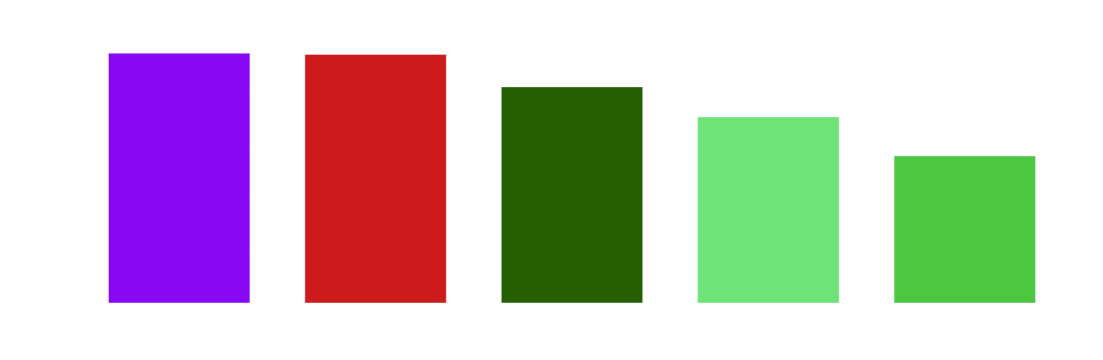

In [15]:
fig = px.bar(result, 
             x='Location', 
             y='percentage_contribution', 
             title='Percentage Contribution of Revenue by Location',
             labels={'percentage_contribution': 'Percentage of Total Revenue (%)', 'Location': 'Location'})

fig.update_layout(
    xaxis_title="Location",
    yaxis_title="Percentage of Total Revenue (%)",
    yaxis_tickformat=".2f",
    margin=dict(l=40, r=40, t=40, b=40),
    font=dict(size=14),
    font_color='white',
    plot_bgcolor='rgba(0, 0, 0, 0)',
    paper_bgcolor='rgba(0, 0, 0, 0)',  
    bargap=0.2,
    bargroupgap=0.1
)


fig.update_traces(marker=dict(color=['#8808f3', '#cc1b1a', '#265f01', '#6ee377', '#4dc640']))
fig.show()

In [16]:
query = """
    SELECT 
        SUM("stock levels") AS "Stock Levels",
        SUM("Lead Times") AS "Lead Times"
    FROM 
        df;
"""

result = duckdb.query(query).df()

print(result)

   Stock Levels  Lead Times
0        4777.0      1596.0


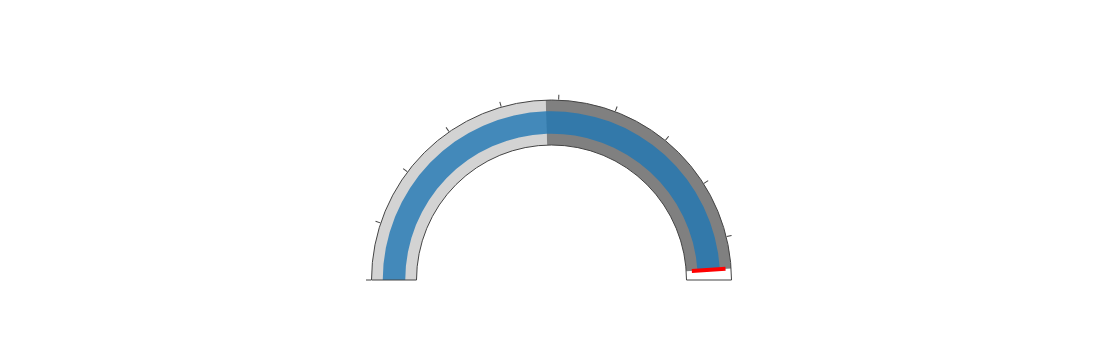

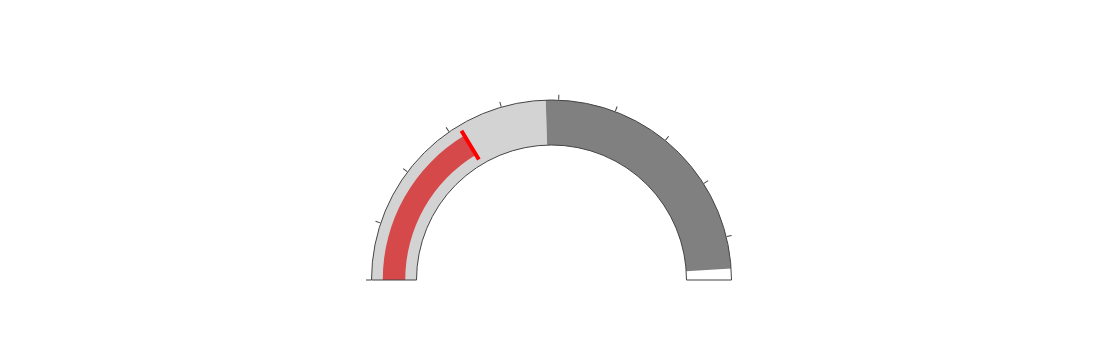

In [17]:
total_stock_levels = result['Stock Levels'][0]
total_lead_times = result['Lead Times'][0]

fig_stock_levels = go.Figure(go.Indicator(
    mode="number+gauge",
    value=total_stock_levels,
    # title={'text': "Total Stock Levels"},
    gauge={
        'axis': {'range': [0, max(total_stock_levels, total_lead_times) + 100]},
        'bar': {'color': "rgba(31, 119, 180, 0.8)"},
        'steps': [
            {'range': [0, max(total_stock_levels, total_lead_times) / 2], 'color': "lightgray"},
            {'range': [max(total_stock_levels, total_lead_times) / 2, max(total_stock_levels, total_lead_times)], 'color': "gray"}
        ],
        'threshold': {
            'line': {'color': "red", 'width': 4},
            'thickness': 0.75,
            'value': total_stock_levels
        }
    }
))

fig_stock_levels.update_layout(
    title={'text': "Total Stock Levels", 'font': {'size': 20}},
    font=dict(size=18, color='white'),
    plot_bgcolor='rgba(0, 0, 0, 0)',
    paper_bgcolor='rgba(0, 0, 0, 0)',
)

fig_lead_times = go.Figure(go.Indicator(
    mode="number+gauge",
    value=total_lead_times,
    # title={'text': "Total Lead Times"},
    gauge={
        'axis': {'range': [0, max(total_stock_levels, total_lead_times) + 100]},
        'bar': {'color': "rgba(214, 39, 40, 0.8)"},
        'steps': [
            {'range': [0, max(total_stock_levels, total_lead_times) / 2], 'color': "lightgray"},
            {'range': [max(total_stock_levels, total_lead_times) / 2, max(total_stock_levels, total_lead_times)], 'color': "gray"}
        ],
        'threshold': {
            'line': {'color': "red", 'width': 4},
            'thickness': 0.75,
            'value': total_lead_times
        }
    }
))

fig_lead_times.update_layout(
    title={'text': "Total Lead Times", 'font': {'size': 20}},
    font=dict(size=18, color='white'),
    plot_bgcolor='rgba(0, 0, 0, 0)',
    paper_bgcolor='rgba(0, 0, 0, 0)',
)

fig_stock_levels.show()
fig_lead_times.show()

In [18]:
query = """
    SELECT 
        SUM("Order quantities") AS "Total Orders Quantity"
    FROM 
        df;
"""

result = duckdb.query(query).fetchall()

total_orders_quantity = result[0][0]

print(f"The total quantity of orders placed is: {total_orders_quantity}")


The total quantity of orders placed is: 4922


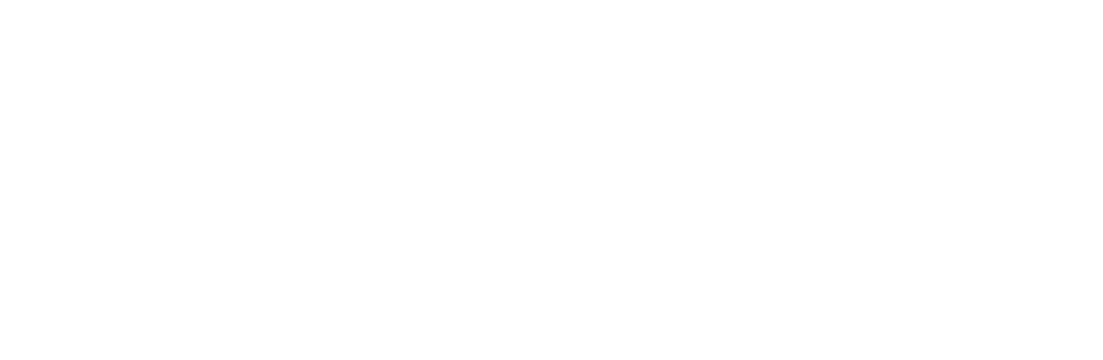

In [19]:
total_orders_quantity = result[0][0]

fig = go.Figure()

fig.add_trace(go.Indicator(
    mode="number",
    value=total_orders_quantity,
    title={"text": "Total Orders Quantity"},
    number={"valueformat": ",.0f"}
))

fig.update_layout(
    font=dict(size=18, color='white'),
    margin=dict(l=20, r=20, t=80, b=20),
    paper_bgcolor='rgba(0, 0, 0, 0)',
)

fig.show()

In [20]:
result = df.groupby('Location')['Order quantities'].sum().reset_index()

result = result.sort_values(by='Order quantities', ascending=False)

print(result)

    Location  Order quantities
3    Kolkata              1228
1    Chennai              1109
4     Mumbai              1083
0  Bangalore               769
2      Delhi               733


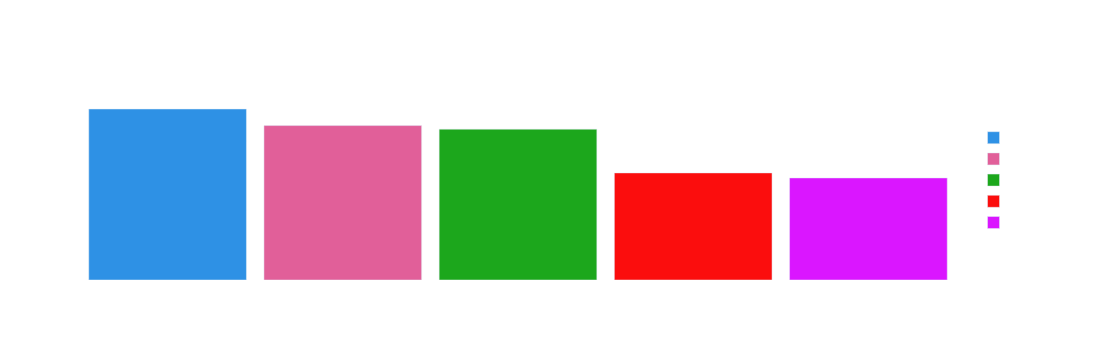

In [21]:
fig = px.bar(result, x='Location', y='Order quantities',
             title='Total Order Quantities by Location',
             labels={'Location': 'Location', 'Order quantities': 'Total Order Quantities'},
             color='Location',
             color_discrete_sequence=px.colors.qualitative.Dark24,
             )

fig.update_layout(
    xaxis_title="Location",
    yaxis_title="Total Order Quantities",
    font=dict(size=14,color='white'),
    plot_bgcolor='rgba(0, 0, 0, 0)',
    paper_bgcolor='rgba(0, 0, 0, 0)',
    bargap=0.1, 
)

fig.show()

In [22]:
costs_by_product = df.groupby('Product type')['Manufacturing costs'].sum().reset_index()

costs_by_product['Manufacturing costs'] = costs_by_product['Manufacturing costs'].round(2)

costs_by_product = costs_by_product.sort_values(by='Manufacturing costs', ascending=False)

print(costs_by_product)

  Product type  Manufacturing costs
2     skincare              1959.73
1     haircare              1647.57
0    cosmetics              1119.37


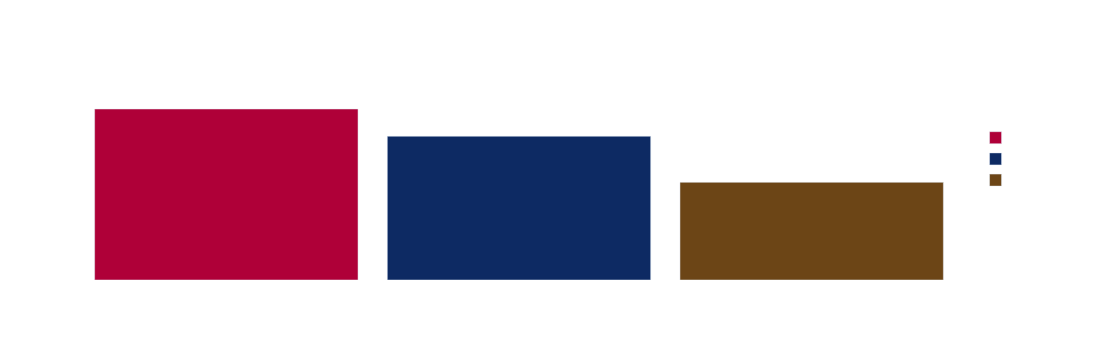

In [23]:
fig = px.bar(costs_by_product, 
             x='Product type', 
             y='Manufacturing costs', 
             title='Manufacturing Costs by Product Type',
             labels={'Manufacturing costs': 'Manufacturing Costs ($)', 'Product type': 'Product Type'},
             color='Product type',
             color_discrete_sequence=px.colors.qualitative.Dark24_r
            )

fig.update_layout(
    xaxis_title="Product Type",
    yaxis_title="Manufacturing Costs ($)",
    font=dict(size=14, color='White'),
    plot_bgcolor='rgba(0, 0, 0, 0)',
    paper_bgcolor='rgba(0, 0, 0, 0)',
    bargap=0.1,
)

fig.show()

In [24]:
# Calculate sum of price and manufacturing costs for each product type
price_costs_by_product = df.groupby('Product type').agg(
    Price=('Price', 'sum'),
    Manufacturing_costs=('Manufacturing costs', 'sum')
).reset_index()

# Format sums of price and manufacturing costs
price_costs_by_product['Price'] = price_costs_by_product['Price'].round(2)
price_costs_by_product['Manufacturing_costs'] = price_costs_by_product['Manufacturing_costs'].round(2)

# Calculate difference between price and manufacturing costs
price_costs_by_product['Profit_margin'] = (price_costs_by_product['Price'] - price_costs_by_product['Manufacturing_costs']).round(2)

price_costs_by_product = price_costs_by_product.sort_values(by='Product type')

price_costs_by_product

Product type    Price  Manufacturing_costs  Profit_margin
0    cosmetics  1491.39              1119.37         372.02
1     haircare  1564.49              1647.57         -83.08
2     skincare  1890.37              1959.73         -69.36

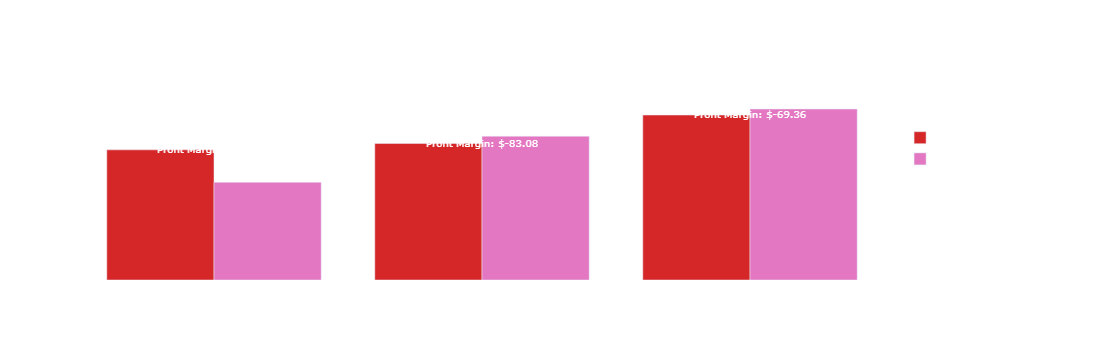

In [25]:
fig = px.bar(price_costs_by_product, 
             x='Product type', 
             y=['Price', 'Manufacturing_costs'],
             title='Comparison of Price and Manufacturing Costs by Product Type',
             labels={'value': 'Cost ($)', 'Product type': 'Product Type', 'variable': 'Cost Type'},
             color_discrete_sequence=['#d62728', '#e377c2'],
             barmode='group'
            )

for i, row in price_costs_by_product.iterrows():
    fig.add_annotation(
        x=row['Product type'],
        y=row['Price'] + 5,
        text=f"Profit Margin: ${row['Profit_margin']}",
        showarrow=False,
        font=dict(size=10, color='White'),
    )

fig.update_layout(
    xaxis_title="Product Type",
    yaxis_title="Cost ($)",
    font=dict(size=14, color='White'),
    plot_bgcolor='rgba(0, 0, 0, 0)',
    paper_bgcolor='rgba(0, 0, 0, 0)',
    bargap=0.2,
)

fig.show()

In [26]:
profitability_by_product = df.groupby('Product type').agg(
    Revenue=('Revenue generated', 'sum'),
    Cost=('Costs', 'sum')
).reset_index()

# Calculate profit (Revenue - Cost)
profitability_by_product['Profit'] = (profitability_by_product['Revenue'] - profitability_by_product['Cost']).round(2)

profitability_by_product = profitability_by_product.sort_values(by='Product type')
profitability_by_product

Product type        Revenue          Cost     Profit
0    cosmetics  161521.265999  13366.397283  148154.87
1     haircare  174455.390605  17328.862865  157126.53
2     skincare  241628.162133  22229.318068  219398.84

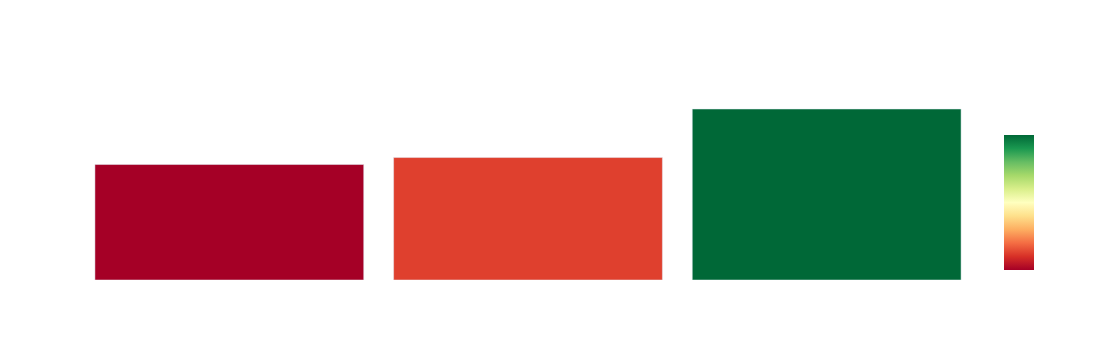

In [27]:
fig = px.bar(profitability_by_product, 
             x='Product type', 
             y='Profit',
             title='Overall Profitability by Product Type',
             labels={'Profit': 'Profit ($)', 'Product type': 'Product Type'},
             color='Profit',
             color_continuous_scale=px.colors.diverging.RdYlGn,
            )

fig.update_layout(
    xaxis_title="Product Type",
    yaxis_title="Profit ($)",
    font=dict(size=14,color='white'),
    plot_bgcolor='rgba(0, 0, 0, 0)',
    paper_bgcolor='rgba(0, 0, 0, 0)',
    bargap=0.1,
)


fig.show()

In [28]:
# Calculate average lead time for each product type
average_lead_time_by_product = df.groupby('Product type')['Lead times'].mean().reset_index()

# Format the average lead time to 4 decimal places
average_lead_time_by_product['Average Lead Time'] = average_lead_time_by_product['Lead times'].round(2)

average_lead_time_by_product = average_lead_time_by_product.sort_values(by='Product type')

average_lead_time_by_product

Product type  Lead times  Average Lead Time
0    cosmetics   15.384615              15.38
1     haircare   15.529412              15.53
2     skincare   16.700000              16.70

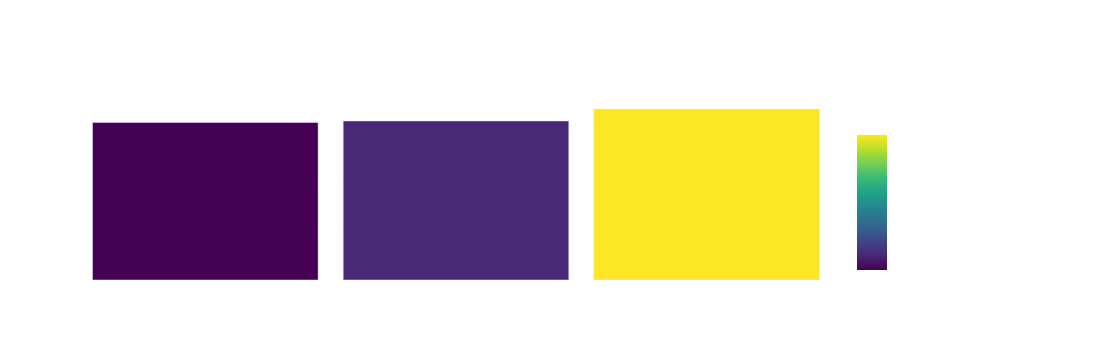

In [29]:
fig = px.bar(average_lead_time_by_product, 
             x='Product type', 
             y='Average Lead Time',
             title='Average Lead Time by Product Type',
             labels={'Average Lead Time': 'Average Lead Time (days)', 'Product type': 'Product Type'},
             color='Average Lead Time',
             color_continuous_scale='viridis',
            )

fig.update_layout(
    xaxis_title="Product Type",
    yaxis_title="Average Lead Time (days)",
    font=dict(size=14,color='white'),
    plot_bgcolor='rgba(0, 0, 0, 0)',
    paper_bgcolor='rgba(0, 0, 0, 0)',
    bargap=0.1,
)

fig.show()

In [30]:
total_lead_times = df['Lead times'].sum()
total_stock_levels = df['Stock levels'].sum()
total_availability = df['Availability'].sum()

print(f"Total Lead Times: {total_lead_times}")
print(f"Total Stock Levels: {total_stock_levels}")
print(f"Total Availability: {total_availability}")

Total Lead Times: 1596
Total Stock Levels: 4777
Total Availability: 4840


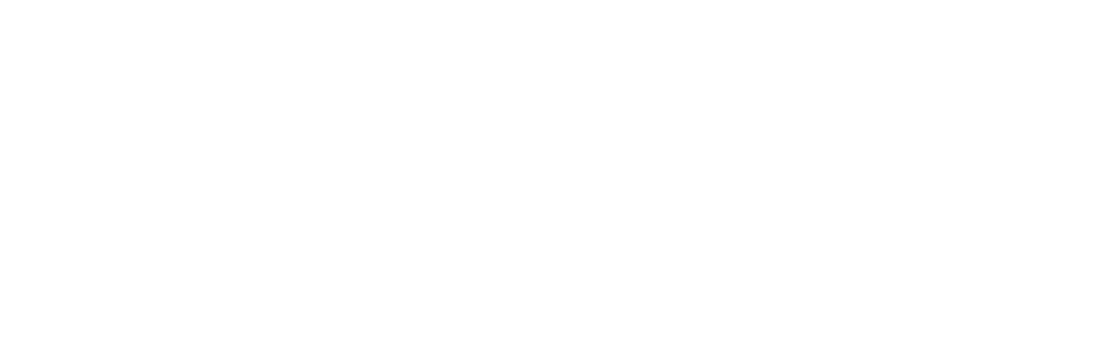

In [31]:
fig = go.Figure()

fig.add_trace(go.Indicator(
    mode="number",
    value=total_availability,
    title={"text": "Total Availability"},
    domain={'x': [0, 1], 'y': [0, 1]}
))

fig.update_layout(
    font=dict(size=18, color='white'),
    plot_bgcolor='rgba(0, 0, 0, 0)',
    paper_bgcolor='rgba(0, 0, 0, 0)',

)

fig.show()

In [32]:
sum_defect_rates = df.groupby('Inspection results')['Defect rates'].sum().reset_index()
total_defect_rate = df['Defect rates'].sum()

# Calculate the percentage contribution of each inspection result's defect rate
sum_defect_rates['Percentage of Total Defect Rate'] = \
    (sum_defect_rates['Defect rates'] / total_defect_rate) * 100

# Calculate the average defect rate for each inspection result
avg_defect_rate = df.groupby('Inspection results')['Defect rates'].mean().reset_index()

# Merge the results and order by 'Defect Rates'
result = pd.merge(sum_defect_rates, avg_defect_rate, on='Inspection results', suffixes=('_sum', '_avg'))
result = result.sort_values(by='Defect rates_sum', ascending=False)

result

Inspection results  Defect rates_sum  Percentage of Total Defect Rate  \
0               Fail         92.494877                        40.618559   
2            Pending         88.322929                        38.786474   
1               Pass         46.897993                        20.594967   

   Defect rates_avg  
0          2.569302  
2          2.154218  
1          2.039043

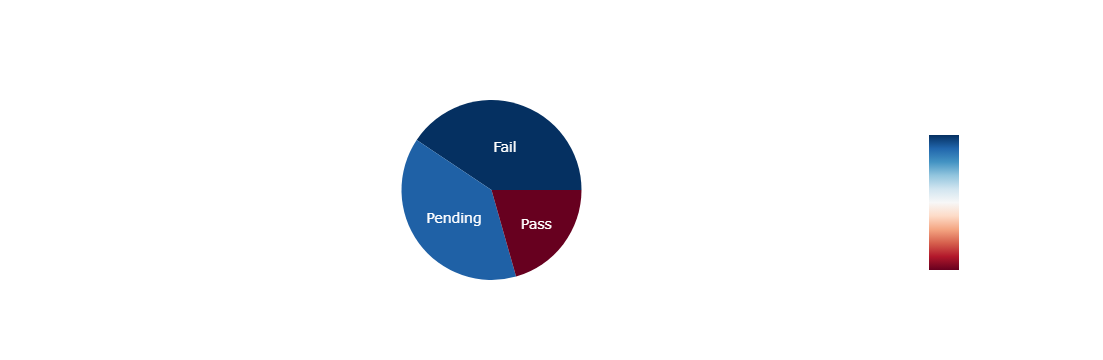

In [33]:
fig = px.sunburst(result, path=['Inspection results'], values='Defect rates_sum',
                  hover_data=['Percentage of Total Defect Rate', 'Defect rates_avg'],
                  title='Defect Rates by Inspection Results (Sunburst Chart)',
                  color='Defect rates_sum',
                  color_continuous_scale='RdBu')

fig.update_layout(
    font=dict(size=14, color='white'),
    plot_bgcolor='rgba(0, 0, 0, 0)', 
    paper_bgcolor='rgba(0, 0, 0, 0)', 
)
fig.show()

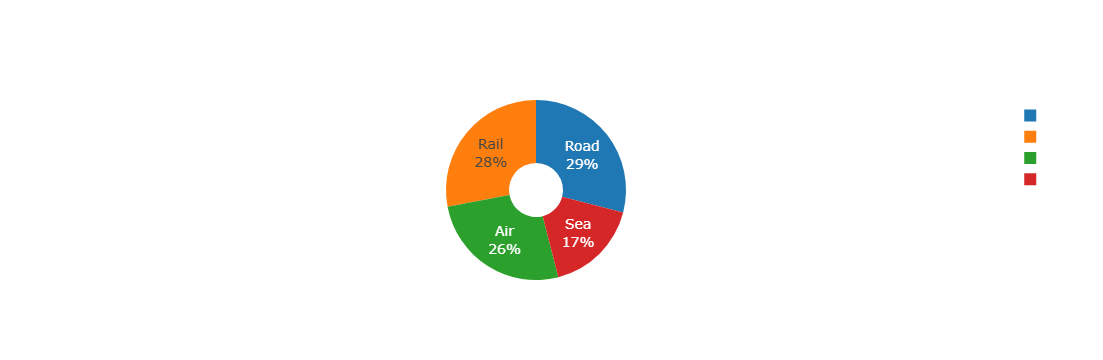

In [34]:
mode_counts = df['Transportation modes'].value_counts()

fig = go.Figure()

fig.add_trace(go.Pie(
    labels=mode_counts.index,
    values=mode_counts.values,
    textinfo='percent+label',
    marker_colors=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728'],
    textposition='inside',
    hole=0.3
))

fig.update_layout(
    title='Frequency of Transportation Modes',
    font=dict(size=14, color='white'),
    plot_bgcolor='rgba(0, 0, 0, 0)',
    paper_bgcolor='rgba(0, 0, 0, 0)',

)

fig.show()


In [35]:
mode_summary = df.groupby('Transportation modes').agg({
    'Lead times': 'sum',
    'Costs': 'sum'
}).reset_index()

print(mode_summary)

  Transportation modes  Lead times         Costs
0                  Air         475  14604.527498
1                 Rail         417  15168.931559
2                 Road         497  16048.193639
3                  Sea         207   7102.925520


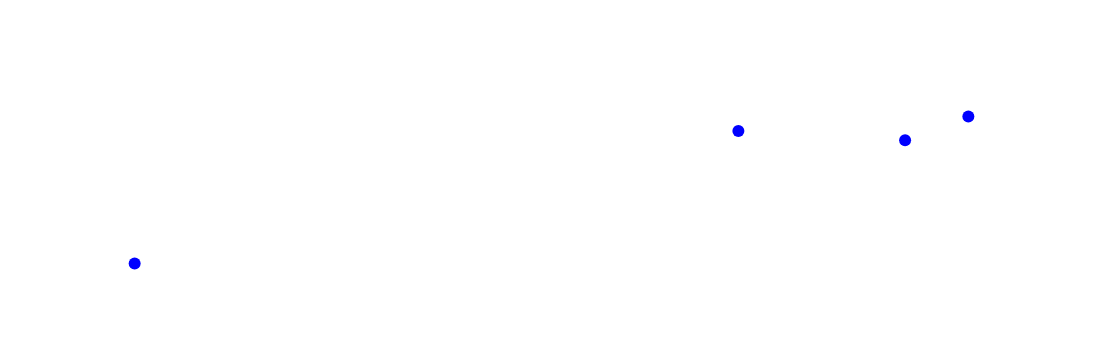

In [36]:
fig = go.Figure()

fig.add_trace(go.Scatter(
    x=mode_summary['Lead times'],
    y=mode_summary['Costs'],
    mode='markers',
    marker=dict(color='blue', size=12),
    text=mode_summary['Transportation modes'],
    hovertemplate='<b>Transport Mode</b>: %{text}<br><b>Lead Time</b>: %{x}<br><b>Cost</b>: %{y}',
))

fig.update_layout(
    title='Relationship Between Transportation Modes, Lead Time, and Costs',
    xaxis_title='Lead Time',
    yaxis_title='Costs',
    font=dict(size=14, color='white'),
    plot_bgcolor='rgba(0, 0, 0, 0)',
    paper_bgcolor='rgba(0, 0, 0, 0)',
)

fig.show()

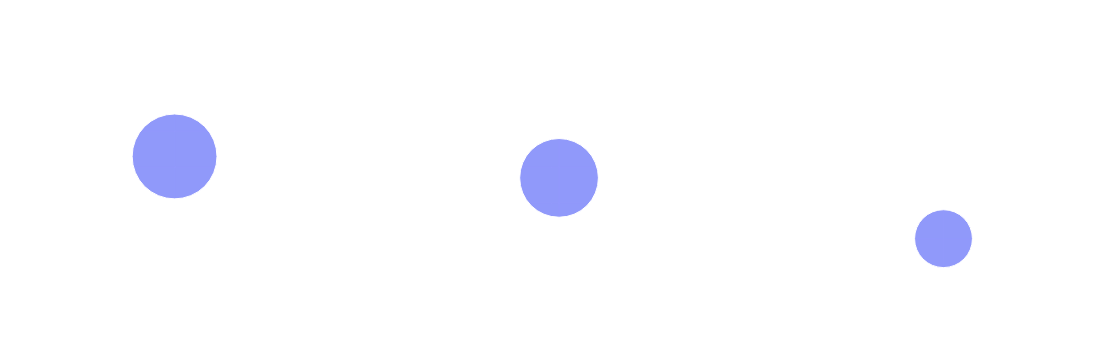

In [37]:
route_counts = df['Routes'].value_counts()

route_counts_df = route_counts.reset_index()
route_counts_df.columns = ['Routes', 'Count']

fig = px.scatter(route_counts_df, x='Routes', y='Count', size='Count', hover_name='Routes',
                 title='Bubble Chart of Transportation Routes with Count',
                 labels={'Routes': 'Transportation Routes', 'Count': 'Frequency'},
                 size_max=60)

fig.update_layout(
    showlegend=False,
    xaxis_title="Transportation Routes",
    yaxis_title="Frequency",
    font=dict(size=14, color='white'),
    plot_bgcolor='rgba(0, 0, 0, 0)',
    paper_bgcolor='rgba(0, 0, 0, 0)',
)
fig.show()

In [38]:
# Group by 'Routes' and calculate sum of 'Lead times' and 'Costs'
route_summary = df.groupby('Routes').agg({'Lead times': 'sum', 'Costs': 'sum'}).reset_index()
route_summary = route_summary.sort_values(by='Lead times', ascending=False)

route_summary

Routes  Lead times         Costs
1  Route B         637  22039.384026
0  Route A         632  20875.774494
2  Route C         327  10009.419696

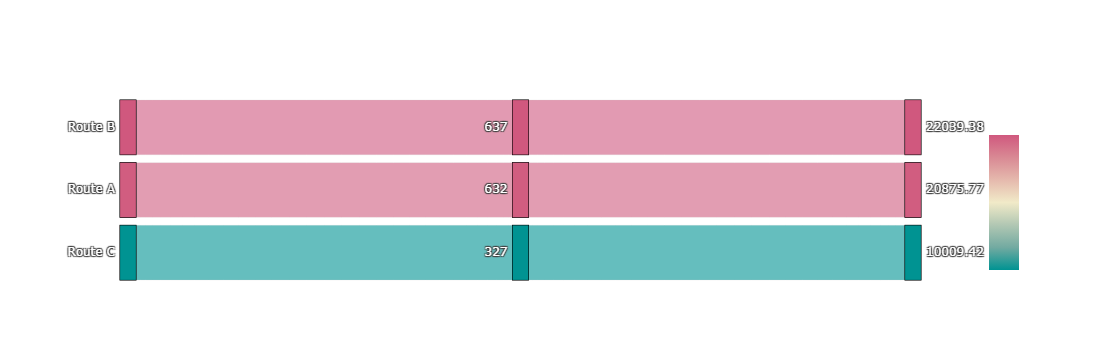

In [39]:
route_summary = df.groupby('Routes').agg({'Lead times': 'sum', 'Costs': 'sum'}).reset_index()

route_summary = route_summary.sort_values(by='Lead times', ascending=False)

route_summary['Costs'] = route_summary['Costs'].round(2)

fig = px.parallel_categories(
    route_summary,
    dimensions=['Routes', 'Lead times', 'Costs'],
    color='Lead times',
    title='Impact of Routes on Lead Times and Costs',
    color_continuous_scale=px.colors.diverging.Tealrose
)

fig.update_layout(
    font=dict(size=14, color='white'),
    plot_bgcolor='rgba(0, 0, 0, 0)',
    paper_bgcolor='rgba(0, 0, 0, 0)',
)

fig.show()


In [40]:
average_defect_rate = df.groupby('Product type').agg({'Defect rates': 'mean'}).reset_index()

average_defect_rate['Defect rates'] = average_defect_rate['Defect rates'].round(2)

average_defect_rate.columns = ['Product Type', 'Average Defect Rate']

print(average_defect_rate)

  Product Type  Average Defect Rate
0    cosmetics                 1.92
1     haircare                 2.48
2     skincare                 2.33


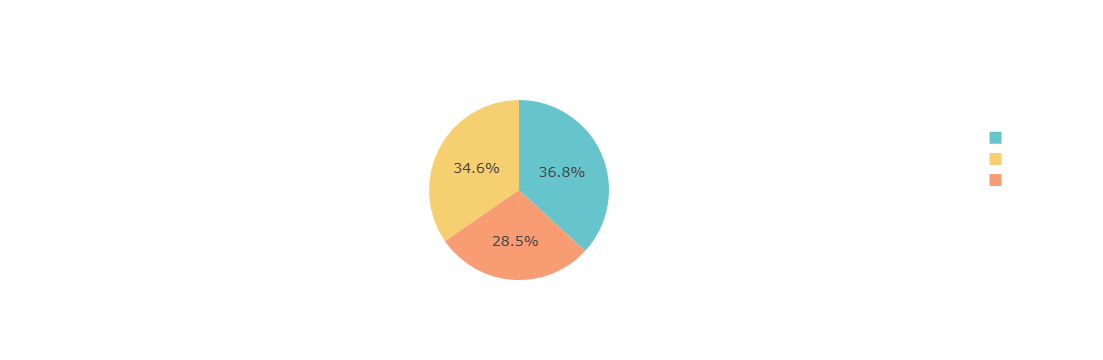

In [41]:
fig = px.pie(
    average_defect_rate,
    names='Product Type',
    values='Average Defect Rate',
    title='Average Defect Rate by Product Type',
    color_discrete_sequence=px.colors.qualitative.Pastel
)

fig.update_layout(
    font=dict(size=14,color='white'),
    showlegend=True,
    legend_title_text='Product Type',
    plot_bgcolor='rgba(0, 0, 0, 0)',
    paper_bgcolor='rgba(0, 0, 0, 0)',
)

fig.show()

In [42]:
cost_summary = df.groupby('Inspection results').agg({'Manufacturing costs': 'sum'}).reset_index()

total_costs = cost_summary['Manufacturing costs'].sum()

cost_summary['Percentage Contribution'] = (cost_summary['Manufacturing costs'] / total_costs * 100).round(2)

cost_summary['Manufacturing costs'] = cost_summary['Manufacturing costs'].astype(float).round(2)
cost_summary['Percentage Contribution'] = cost_summary['Percentage Contribution'].astype(float).round(2)

cost_summary = cost_summary.sort_values(by='Manufacturing costs', ascending=False)

print(cost_summary)

  Inspection results  Manufacturing costs  Percentage Contribution
0               Fail              1880.30                    39.78
2            Pending              1785.07                    37.77
1               Pass              1061.30                    22.45


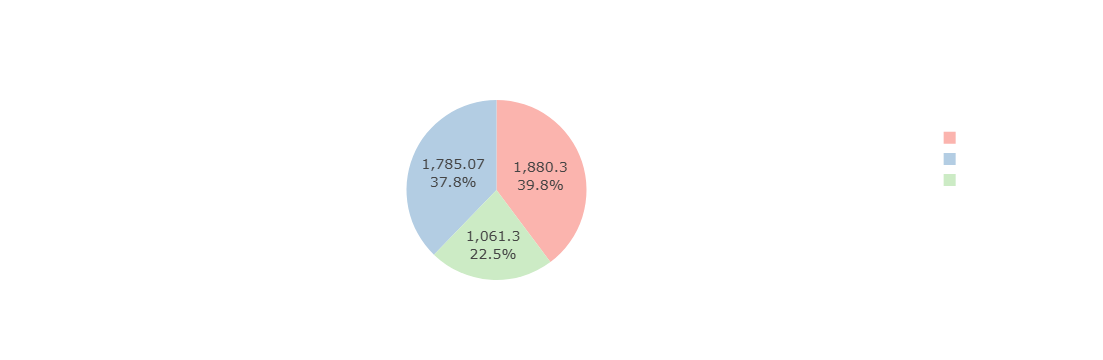

In [43]:
fig = px.pie(
    cost_summary,
    names='Inspection results',
    values='Manufacturing costs',
    title='Manufacturing Costs by Inspection Results',
    color_discrete_sequence=px.colors.qualitative.Pastel1
)

fig.update_traces(
    hoverinfo='label+value+percent',
    textinfo='value+percent'
)

fig.update_layout(
    font=dict(size=14,color='white'),
    showlegend=True,
    legend_title_text='Inspection Results',
    plot_bgcolor='rgba(0, 0, 0, 0)',
    paper_bgcolor='rgba(0, 0, 0, 0)',
)

fig.show()

In [44]:
total_production_volumes = df['Production volumes'].sum()
total_stock_levels = df['Stock levels'].sum()
total_order_quantities = df['Order quantities'].sum()

print(f"Total Production Volumes: {total_production_volumes}")
print(f"Total Stock Levels: {total_stock_levels}")
print(f"Total Order Quantities: {total_order_quantities}")

summary_df = pd.DataFrame({
    'Metric': ['Production Volumes', 'Stock Levels', 'Order Quantities'],
    'Total': [total_production_volumes, total_stock_levels, total_order_quantities]
})

print(summary_df)

Total Production Volumes: 56784
Total Stock Levels: 4777
Total Order Quantities: 4922
               Metric  Total
0  Production Volumes  56784
1        Stock Levels   4777
2    Order Quantities   4922


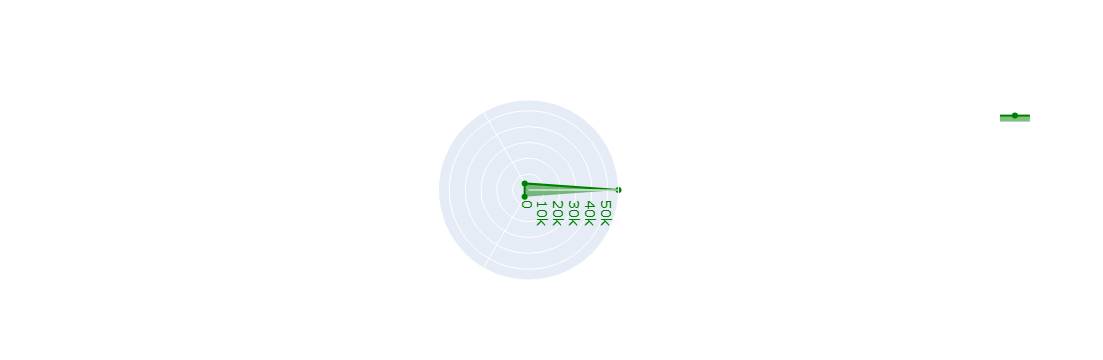

In [45]:
fig = go.Figure()

fig.add_trace(go.Scatterpolar(
    r=[total_production_volumes, total_stock_levels, total_order_quantities],
    theta=['Production Volumes', 'Stock Levels', 'Order Quantities'],
    fill='toself',
    name='Metrics',
    line_color='green'
))

fig.update_layout(
    title='Relationship between Production Volume, Stock Levels, and Order Quantities',
    font=dict(size=14,color='white'),
    polar=dict(
        radialaxis=dict(
            visible=True,
            range=[0, max(total_production_volumes, total_stock_levels, total_order_quantities)],
            color = 'green'
        )
    ),
    showlegend=True,
    plot_bgcolor='rgba(0, 0, 0, 0)',
    paper_bgcolor='rgba(0, 0, 0, 0)',
)

fig.show()

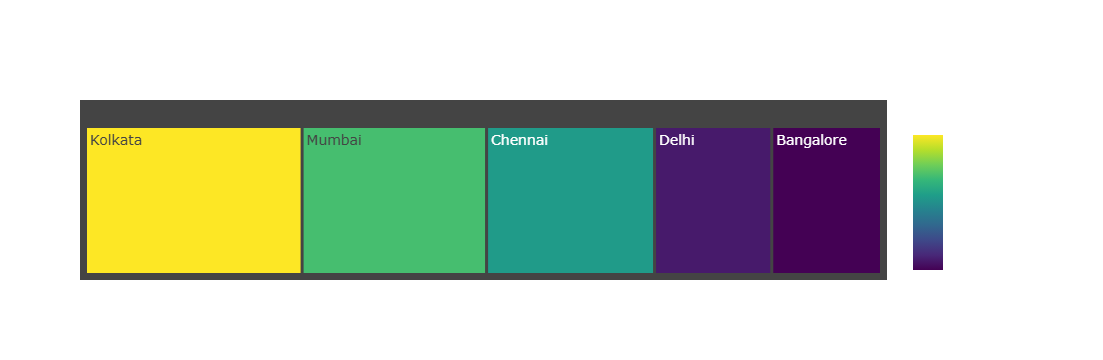

In [46]:
location_summary = df.groupby('Location').agg({'Production volumes': 'sum'}).reset_index()

location_summary = location_summary.sort_values(by='Production volumes', ascending=False)

fig = px.treemap(
    location_summary,
    path=['Location'],
    values='Production volumes',
    color='Production volumes',
    color_continuous_scale='Viridis',
    title='Production Volumes by Location'
)

fig.update_layout(
    font=dict(size=14, color='White'),
    plot_bgcolor='rgba(0, 0, 0, 0)',
    paper_bgcolor='rgba(0, 0, 0, 0)',
)

fig.show()

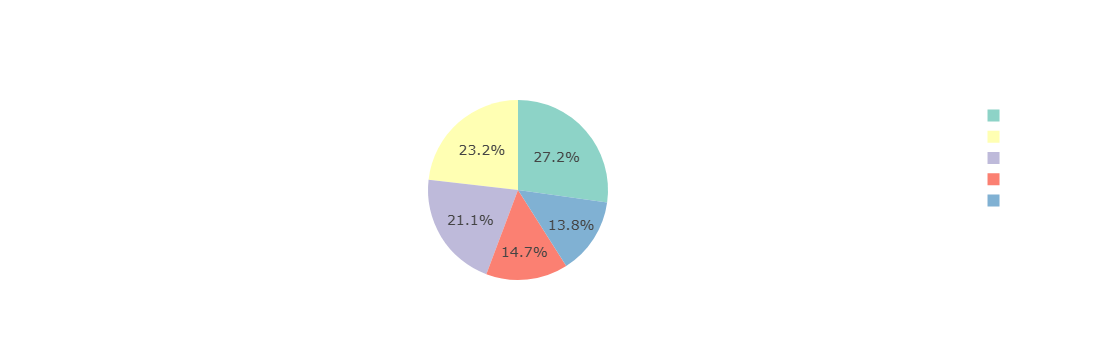

In [47]:
location_summary = df.groupby('Location').agg({'Production volumes': 'sum'}).reset_index()

total_production_volumes = location_summary['Production volumes'].sum()

location_summary['Percentage'] = (location_summary['Production volumes'] / total_production_volumes) * 100

location_summary = location_summary.sort_values(by='Production volumes', ascending=False)

fig = px.pie(
    location_summary,
    names='Location',
    values='Percentage',
    title='Percentage of Production Volumes Aligned with Market Demands by Location',
    color_discrete_sequence=px.colors.qualitative.Set3
)

fig.update_layout(
    font=dict(size=14, color='white'),
    plot_bgcolor='rgba(0, 0, 0, 0)',
    paper_bgcolor='rgba(0, 0, 0, 0)',
)
fig.show()

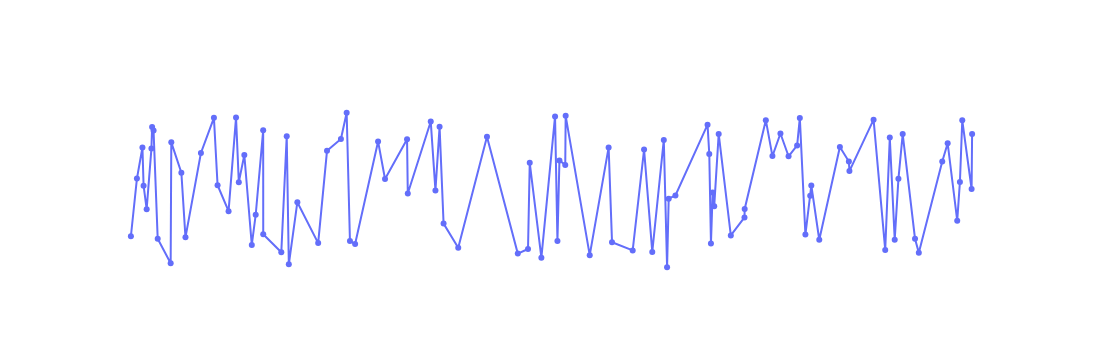

In [48]:
price_revenue_summary = df.groupby('Price').agg({'Revenue generated': 'sum'}).reset_index()

fig = px.line(price_revenue_summary, 
              x='Price', 
              y='Revenue generated', 
              title='Revenue Generated by Price Range',
              labels={'Revenue generated': 'Total Revenue ($)', 'Price Range': 'Price Range'},
              markers=True)

fig.update_layout(
    font=dict(size=14, color='White'),
    plot_bgcolor='rgba(0, 0, 0, 0)',
    paper_bgcolor='rgba(0, 0, 0, 0)',
)

fig.show()

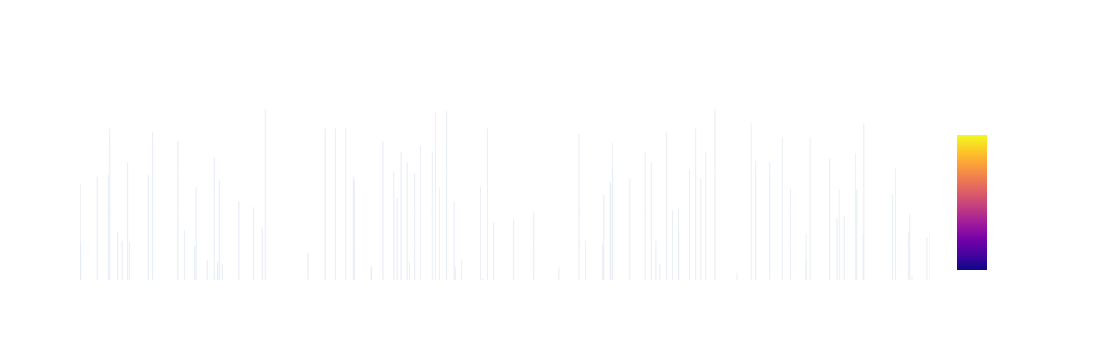

In [49]:
shipping_order_summary = df.groupby('Shipping costs').agg({'Order quantities': 'mean'}).reset_index()

fig = px.bar(shipping_order_summary, 
             x='Shipping costs', 
             y='Order quantities', 
             title='Average Order Quantities by Shipping Cost Range',
             labels={'Order quantities': 'Average Order Quantities', 'Shipping Cost Range': 'Shipping Cost Range'},
             color='Shipping costs',
             color_discrete_sequence=px.colors.qualitative.Bold)

fig.update_layout(
    font=dict(size=14, color='white'),
    plot_bgcolor='rgba(0, 0, 0, 0)',
    paper_bgcolor='rgba(0, 0, 0, 0)',
    xaxis={'categoryorder': 'total descending'}
)

fig.show()

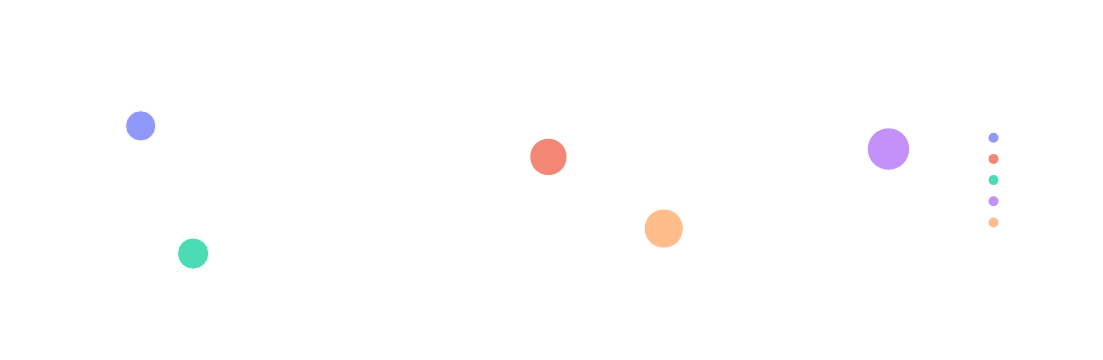

In [50]:
location_summary = df.groupby('Location').agg({'Production volumes': 'sum', 'Manufacturing costs': 'sum'}).reset_index()

fig = px.scatter(location_summary, 
                 x='Production volumes', 
                 y='Manufacturing costs', 
                 color='Location',
                 size='Production volumes',
                 hover_name='Location',
                 title='Relationship between Production Volumes and Manufacturing Costs by Location',
                 labels={'Production volumes': 'Production Volumes', 'Manufacturing costs': 'Manufacturing Costs', 'Location': 'Location'},
                 size_max=30)

fig.update_layout(
    font=dict(size=14, color='white'),
    plot_bgcolor='rgba(0, 0, 0, 0)',
    paper_bgcolor='rgba(0, 0, 0, 0)',
    showlegend=True,
    xaxis_title='Production Volumes',
    yaxis_title='Manufacturing Costs'
)

fig.show()

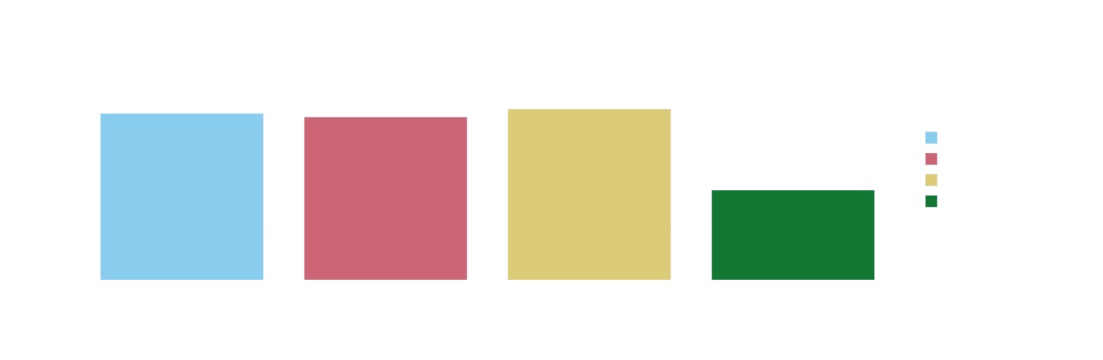

In [51]:
transportation_summary = df.groupby('Transportation modes')['Shipping costs'].sum().reset_index()

fig = px.bar(transportation_summary, 
             x='Transportation modes', 
             y='Shipping costs', 
             color='Transportation modes',
             hover_name='Transportation modes',
             title='Shipping Costs by Transportation Mode',
             labels={'Shipping costs': 'Shipping Costs ($)', 'Transportation modes': 'Transportation Mode'},
             color_discrete_sequence=px.colors.qualitative.Safe)

fig.update_layout(
    font=dict(size=14, color='White'),
    plot_bgcolor='rgba(0, 0, 0, 0)',
    paper_bgcolor='rgba(0, 0, 0, 0)',
    xaxis_title='Transportation Modes',
    yaxis_title='Shipping Costs ($)',
    showlegend=True
)

fig.show()

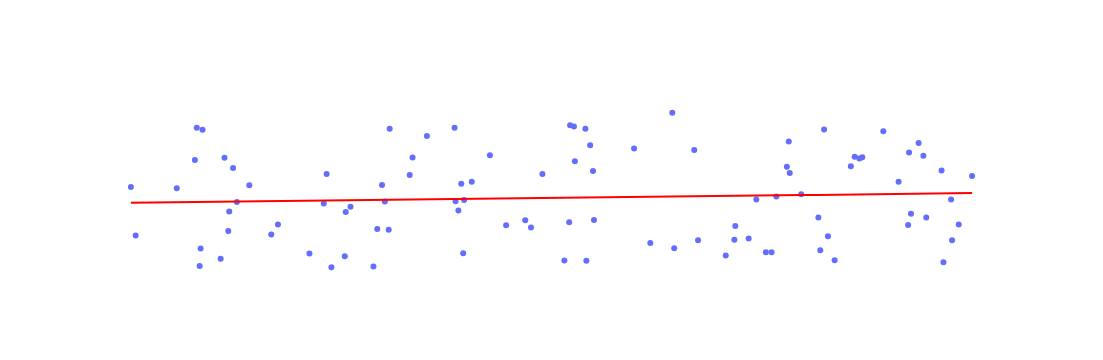

In [52]:
production_summary = df.groupby('Production volumes')['Manufacturing costs'].sum().reset_index()

fig = px.scatter(production_summary, 
                 x='Production volumes', 
                 y='Manufacturing costs', 
                 trendline='ols',
                 title='Manufacturing Costs vs. Production Volumes',
                 labels={'Manufacturing costs': 'Manufacturing Costs ($)', 'Production volumes': 'Production Volumes'},
                 hover_name='Production volumes',
                 trendline_color_override='red'
                )

fig.update_layout(
    font=dict(size=14, color='white'),
    plot_bgcolor='rgba(0, 0, 0, 0)',
    paper_bgcolor='rgba(0, 0, 0, 0)',
    xaxis_title='Production Volumes',
    yaxis_title='Manufacturing Costs ($)',
    showlegend=True
)

fig.show()

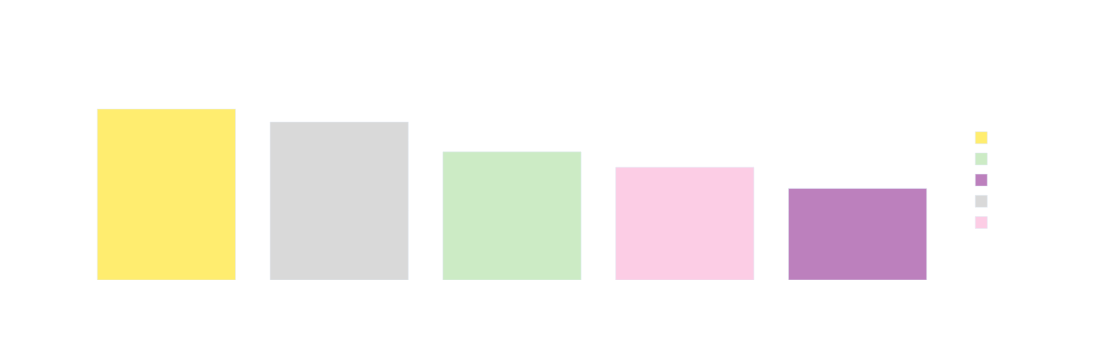

In [53]:
supplier_summary = df.groupby('Supplier name')['Manufacturing costs'].sum().reset_index()

fig = px.bar(
    supplier_summary,
    x='Supplier name',
    y='Manufacturing costs',
    title='Distribution of Manufacturing Costs by Supplier',
    labels={'Supplier name': 'Supplier Name', 'Manufacturing costs': 'Manufacturing Costs ($)'},
    color='Supplier name',
    color_discrete_sequence=px.colors.qualitative.Set3_r
)

fig.update_layout(
    font=dict(size=14, color='White'),
    plot_bgcolor='rgba(0, 0, 0, 0)',
    paper_bgcolor='rgba(0, 0, 0, 0)',
    xaxis={'categoryorder':'total descending'}
)

fig.show()

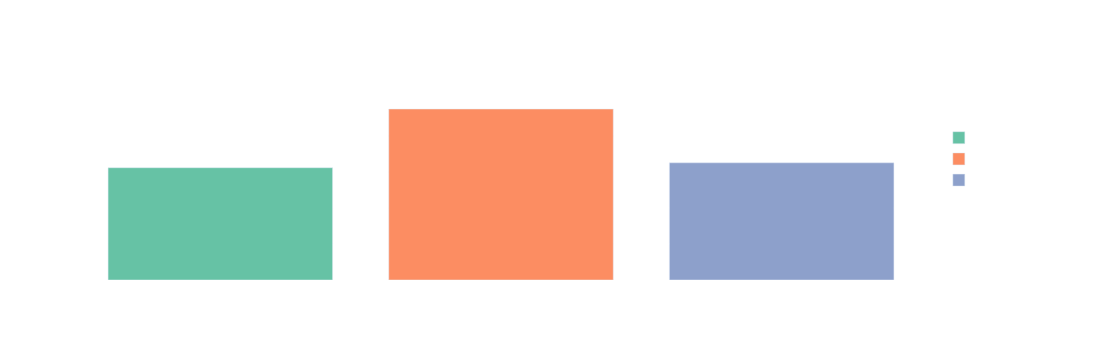

In [54]:
shipping_summary = df.groupby('Shipping carriers')['Shipping costs'].sum().reset_index()

fig = px.bar(
    shipping_summary,
    x='Shipping carriers',
    y='Shipping costs',
    title='Distribution of Shipping Costs by Shipping Carriers',
    labels={'Shipping carriers': 'Shipping Carriers', 'Shipping costs': 'Shipping Costs ($)'},
    color='Shipping carriers',
    color_discrete_sequence=px.colors.qualitative.Set2
)

fig.update_layout(
    font=dict(size=14, color='White'),
    xaxis_title=None,
    yaxis_title='Shipping Costs ($)',
    plot_bgcolor='rgba(0, 0, 0, 0)',
    paper_bgcolor='rgba(0, 0, 0, 0)',
)

fig.show()

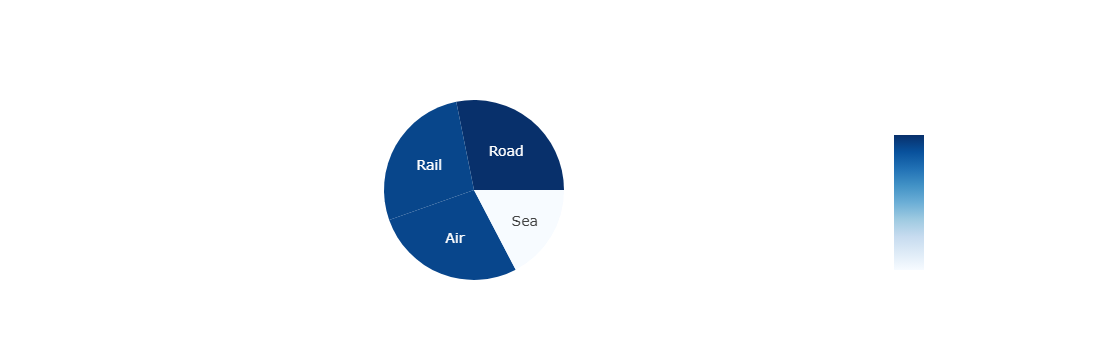

In [55]:
order_summary = df.groupby('Transportation modes')['Order quantities'].sum().reset_index()

fig = px.sunburst(
    order_summary,
    path=['Transportation modes'],
    values='Order quantities',
    title='Total Order Quantities by Transportation Mode',
    color='Order quantities',
    color_continuous_scale=px.colors.sequential.Blues,
    labels={'Transportation modes': 'Transportation Mode', 'Order quantities': 'Total Order Quantities'},
)

fig.update_layout(
    font=dict(size=14, color='White'),
    plot_bgcolor='rgba(0, 0, 0, 0)',
    paper_bgcolor='rgba(0, 0, 0, 0)',
)

fig.show()

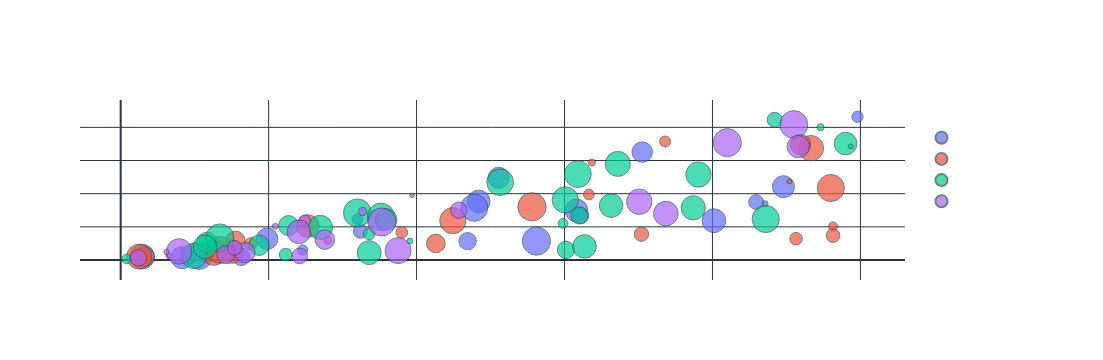

In [56]:
df['Total shipping costs'] = df['Number of products sold'] * df['Shipping costs']

fig = px.scatter(df, 
                 x='Number of products sold', 
                 y='Total shipping costs', 
                 size='Price', 
                 color='Customer demographics',
                 hover_name='SKU',
                 title='Relationship between Number of Products Sold and Total Shipping Costs',
                 labels={'Number of products sold': 'Number of Products Sold', 'Total shipping costs': 'Total Shipping Costs ($)', 'Customer demographics': 'Customer Segment'},
                 template='plotly_dark'
                )

fig.update_traces(marker=dict(line=dict(width=1, color='DarkSlateGrey')),
                  selector=dict(mode='markers'))

fig.update_layout(
    font=dict(size=14, color='white'),
    plot_bgcolor='rgba(0, 0, 0, 0)',
    paper_bgcolor='rgba(0, 0, 0, 0)',
)

fig.show()

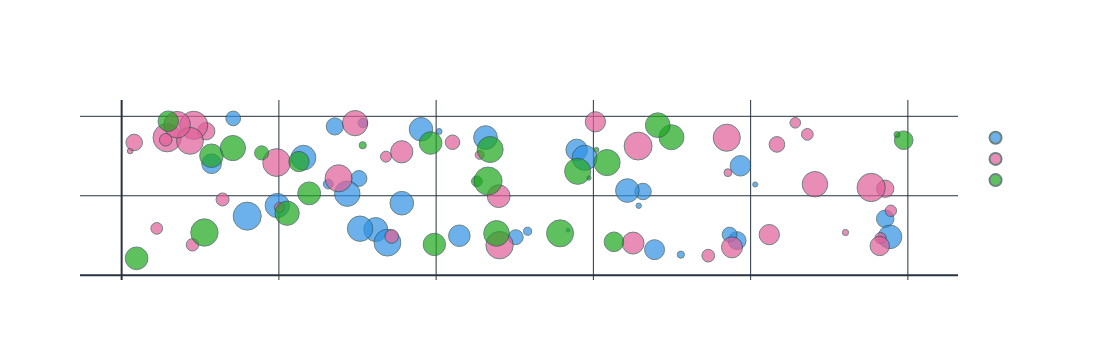

In [57]:
fig = px.scatter(df, 
                 x='Manufacturing costs', 
                 y='Revenue generated', 
                 size='Price', 
                 color='Product type',
                 hover_name='SKU',
                 title='Relationship between Manufacturing Costs and Revenue Generated',
                 labels={'Manufacturing costs': 'Manufacturing Costs ($)', 'Revenue generated': 'Revenue Generated ($)', 'Product type': 'Product Type'},
                 template='plotly_dark',
                 color_discrete_sequence=px.colors.qualitative.Dark24
                )

fig.update_traces(marker=dict(line=dict(width=1, color='DarkSlateGrey')),
                  selector=dict(mode='markers'))

fig.update_layout(
    font=dict(size=14, color='white'),
    plot_bgcolor='rgba(0, 0, 0, 0)',
    paper_bgcolor='rgba(0, 0, 0, 0)',
)
fig.show()

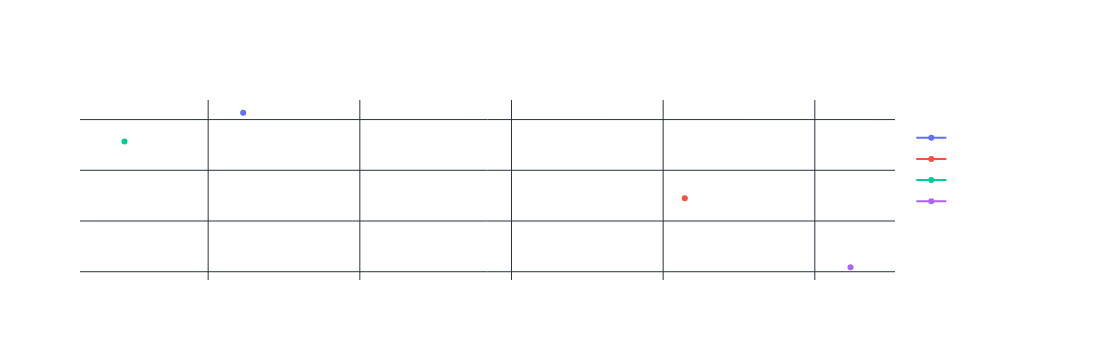

In [58]:
numeric_columns = ['Shipping times', 'Lead times']

transport_summary = df.groupby('Transportation modes')[numeric_columns].mean().reset_index()

fig = px.line(transport_summary, 
              x='Shipping times', 
              y='Lead times', 
              color='Transportation modes',
              title='Average Lead Times vs. Shipping Times by Transportation Mode',
              labels={'Shipping times': 'Shipping Times (days)', 'Lead times': 'Lead Times (days)', 'Transportation modes': 'Transportation Mode'},
              template='plotly_dark',
              line_shape='spline'
             )

fig.update_traces(mode='lines+markers')

fig.update_layout(
    font=dict(size=14, color='white'),
    plot_bgcolor='rgba(0, 0, 0, 0)',
    paper_bgcolor='rgba(0, 0, 0, 0)',
)

fig.show()